<a href="https://colab.research.google.com/github/wp225/sklearn/blob/main/kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [7]:
np.random.seed(1)

In [24]:
X_xor=np.random.randn(200,2)
Y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)

In [29]:
y_xor=np.where(Y_xor,1,-1)

In [30]:
y_xor

array([-1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,
        1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1])

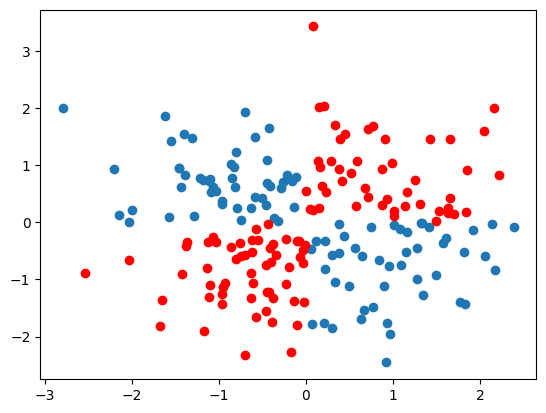

In [38]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1])
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r')
plt.show()


In [46]:
from sklearn.svm import SVC
#svc=SGDClassifier(loss='hinge')

In [48]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor,y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

In [51]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       # plot class examples
       for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

<ipython-input-51-e0053ad13154>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


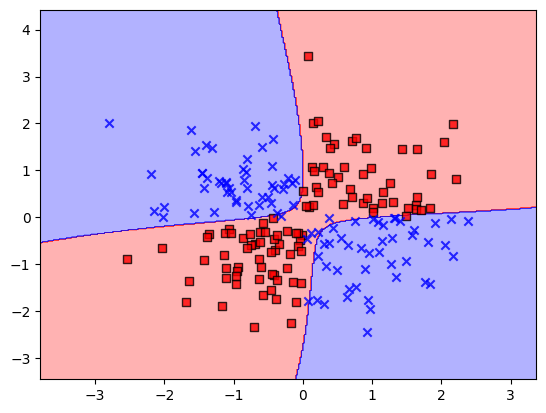

In [53]:
plot_decision_regions(X_xor, y_xor, classifier=svm)